# How to approach a ML problem 

    In the early 1990s as data mining was evolving from toddler to adolescent we spent a lot of time getting the data ready for the fairly limited tools and limited computing power of the day. ‘Data scientists’ were much more likely to be called ‘predictive modelers’ since that type of modeling was state-of-the-art in its day.

    As the 90’s progressed there was a natural flow that drew toward standardizing the lessons we’d learned into a common methodology.  Efforts like this always start out by wondering aloud whether there even was a common approach given that the problems looked so dissimilar.  As it turns out there was.

    Two of leading tools providers of the day, SPSS and Teradata, along with three early adopter user corporations, Daimler, NCR, and OHRA convened a special interest group (SIG) in 1996 (also probably one of the earliest collaborative efforts over the newly available worldwide web) and over the course of less than a year managed to codify what is still today the CRISP-DM, Cross Industry Standard Process for Data Mining.

    CRISP-DM was not actually the first.  SAS Institute that’s been around longer than anyone can remember had its own version called SEMMA (Sample, Explore, Modify, Model, Assess) but within just a year or two many more practitioners were basing their approach on CRISP-DM.


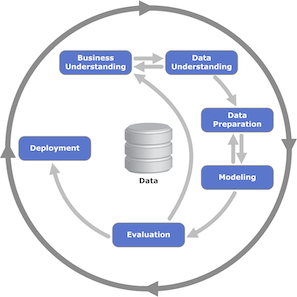

In [17]:
from IPython.display import Image
Image("CRISP.png")

# What is CRISP-DM?

The process or methodology of CRISP-DM is described in these six major steps

    1.Business Understanding

Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.

    2.Data Understanding

Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.

    3.Data Preparation

The data preparation phase covers all activities to construct the final dataset from the initial raw data.

    4.Modeling

Modeling techniques are selected and applied.  Since some techniques like neural nets have specific requirements regarding the form of the data, there can be a loop back here to data prep.

    5.Evaluation

Once one or more models have been built that appear to have high quality based on whichever loss functions have been selected, these need to be tested to ensure they generalize against unseen data and that all key business issues have been sufficiently considered.  The end result is the selection of the champion model(s).

    6.Deployment

Generally this will mean deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and to create a mechanism for the use of that new information in the solution of the original business problem.  Importantly, the code representation must also include all the data prep steps leading up to modeling so that the model will treat new raw data in the same manner as during model development.

You may well observe that there is nothing special here and that’s largely true.  From today’s data science perspective this seems like common sense.  This is exactly the point.  The common process is so logical that it has become embedded into all our education, training, and practice.


# What is TDSP (Team Data Science Process)?

Expanding on CRISP-DM, TDSP is a collection of process flow, tools and utilities to assist not only you but your team provide the Data Science component of your Enterprise Data Platform.

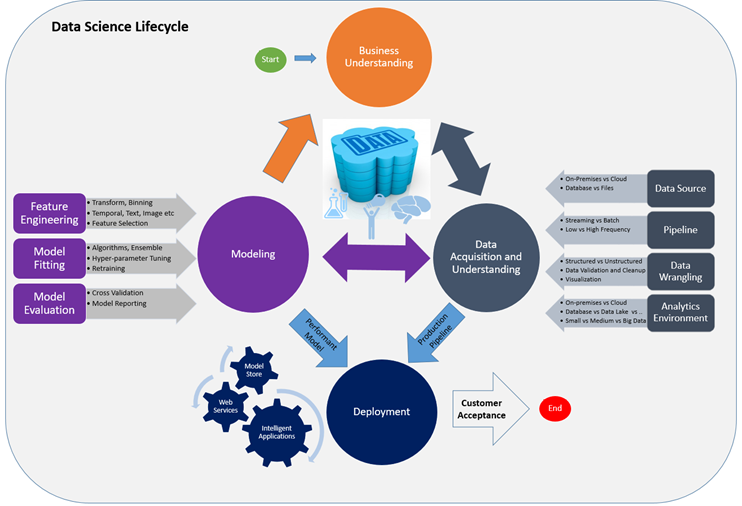

In [18]:
from IPython.display import Image
Image("ms_tdsp.png")

# In class Assignment for CRISP-DM 
# Kickstarter Projects Analysis
### Phase #1 Business understanding

Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity and merchandising. The company's stated mission is to "help bring creative projects to life"

### Phase #2 Data Understanding


### Objective

1. What are the most successfull Kickstarter categories?

2. How does the size of Project's goal effect the success of a project?

3. What is the relationship between the size of a project and its amount of backers for both successful and failed projects?

4. Is it possible to build a model and predict chance of success for a project with this dataset?


In [19]:
#Import all the useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [20]:
df = pd.read_csv('ks-projects-201801.csv') #Import liberaries 

In [21]:
print ('DataFrame Shape', df.shape)
df.head()

('DataFrame Shape', (378661, 15))


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [23]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [24]:
df.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


##### Summary of variable analysis:
There are 7 Numerical Variables  
There are 8 Categorical Variables

### Phase #3 Data Preparation


Performing some data cleaning, validation, and sanity checks before performing any analysis

In [25]:
df = df.drop(['ID', 'goal', 'pledged', 'currency', 'usd pledged'], axis=1) 

Starting by dropping columns that aren't valuable to the analysis or redundant. USD_pledged_real and USD_goal_real will be used rather than Pledged or Currency, as these are in the local country's currency

#### Missing Data

In [26]:
### Checking for missing values
df.isnull().sum()

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Only the 'name' column seems to have missing data. With only 4 samples here, So we can drop these from the dataset.

In [27]:
##Removing missing data
df.dropna(inplace=True)

#### Dates

In [28]:
df.sort_values(by='launched').head(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,2010-06-01,1970-01-01 01:00:00,canceled,0,US,0.0,4000.00
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,2010-08-14,1970-01-01 01:00:00,canceled,0,US,0.0,15000.00
273779,Identity Communications Infographic (Canceled),Design,Design,2010-04-10,1970-01-01 01:00:00,canceled,0,US,0.0,500.00
2842,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,2010-09-15,1970-01-01 01:00:00,canceled,0,US,0.0,5000.00
75397,"""ICHOR"" (Canceled)",Film & Video,Film & Video,2010-05-21,1970-01-01 01:00:00,canceled,0,US,0.0,700.00
319002,Student Auditions Music 2015,Publishing,Publishing,2015-10-31,1970-01-01 01:00:00,suspended,0,CH,0.0,1905.97
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,2010-05-04,1970-01-01 01:00:00,canceled,0,US,0.0,10000.00
169268,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,2009-05-31,2009-04-21 21:02:48,failed,30,US,625.0,1000.00
322000,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,2009-07-20,2009-04-23 00:07:53,failed,3,US,22.0,80000.00
138572,drawing for dollars,Illustration,Art,2009-05-03,2009-04-24 21:52:03,successful,3,US,35.0,20.00


In [29]:
#Convert date columns to datetime and make time delta column (Deadline - Launched) in hours
df.launched = pd.to_datetime(df.launched)
df.deadline = pd.to_datetime(df.deadline)

df['timedelta'] = (df.deadline-df.launched).astype('timedelta64[h]')

In [30]:
df.loc[df['timedelta'] == 0]

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta
156430,A Labradoodle Photobook,Photobooks,Photography,2016-11-11,2016-11-10 23:52:43,successful,8,US,18.0,5.0,0.0
180186,Successful E3 Conference for Dummies Short,Mixed Media,Art,2015-06-18,2015-06-17 23:08:53,failed,0,US,0.0,50.0,0.0


It looks like there were two projects that ended within the same hour of launching. May have to calculate time delta in hours (or days) as a decimal

In [31]:
df['timedelta'] = (df.deadline-df.launched).astype('timedelta64[m]')
df['timedelta_days'] = (df['timedelta']/60)/24
df = df.drop('timedelta', axis=1)

In [32]:
df.sort_values('timedelta_days', ascending=False).head(5)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
319002,Student Auditions Music 2015,Publishing,Publishing,2015-10-31,1970-01-01 01:00:00,suspended,0,CH,0.0,1905.97,16738.958333
2842,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,2010-09-15,1970-01-01 01:00:00,canceled,0,US,0.0,5000.00,14866.958333
48147,1st Super-Size Painting - Social Network Owned...,Art,Art,2010-08-14,1970-01-01 01:00:00,canceled,0,US,0.0,15000.00,14834.958333
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,2010-06-01,1970-01-01 01:00:00,canceled,0,US,0.0,4000.00,14760.958333
75397,"""ICHOR"" (Canceled)",Film & Video,Film & Video,2010-05-21,1970-01-01 01:00:00,canceled,0,US,0.0,700.00,14749.958333


In [33]:
###Dropping projectss with extreme timedelta's greater than 1 year
df = df.loc[df['timedelta_days'] < 366]

#### Outliers and Distributions

To get a good understanding of the questions that are being asked, it may be necessary to remove projects with very small and large project goal's

In [34]:
#### Projects with goals below $500 and more than $10,000,000
print ('Projects with less than $500 goal: ',len(df.loc[df.usd_goal_real < 500.0]))
print ('Projects with more than $10M goal: ',len(df.loc[df.usd_goal_real > 1000000.0]))

('Projects with less than $500 goal: ', 21814)
('Projects with more than $10M goal: ', 1085)


The distribution seems to be skewed heavily to the left, with a few extremely high project goals and many small project goals. May need to scale this data for further data visualization

In [35]:
figsize = (18,6)

def histogram_plot(dataset, column, x_label, title):
    '''
    Plots histogram of input feature
    
    INPUT
    dataset = dataset with feature that is to be plotted
    column = feature of dataset to be plotted
    x_label = Label title of the x axis
    title = Plot figure title
    
    OUTPUT
    Distribution plot
    '''
    plt.figure(figsize=figsize);
    plt.hist(data = dataset, x = column, bins = bins);
    plt.xscale('log');
    plt.xticks(ticks, labels);
    plt.xlabel(x_label);
    plt.grid(False)
    plt.title(title)

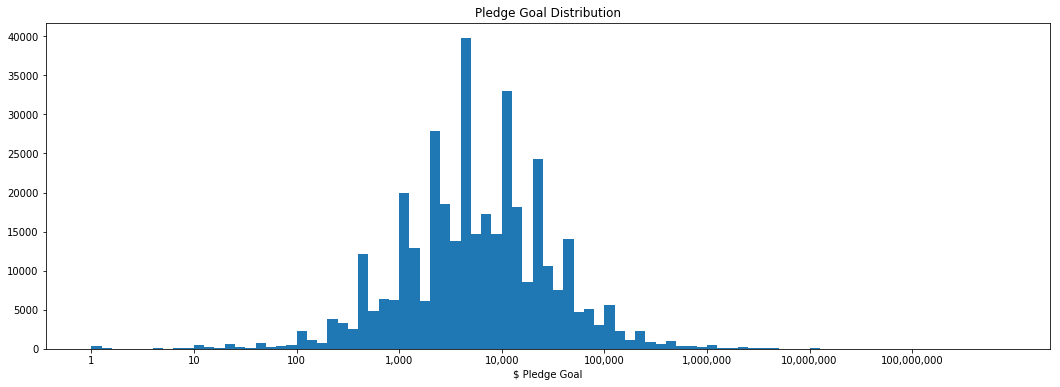

In [36]:
#USD PLEDGE GOAL DISTRIBUTION

#Selected histogram plot prameters using:(np.log10(df['usd_goal_real'].describe()))
bins = 10 ** np.arange(0, 9, .1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'usd_goal_real', '$ Pledge Goal', 'Pledge Goal Distribution')

Data scaled with Log10 to see a much cleaner and easily understood histogram of usd pledge goals. Any modeling for prediction will require these values to be scaled.

Projects with Pledge goals between 100 and 1,000,000 USD seem to be the appropriate sample for future modeling.

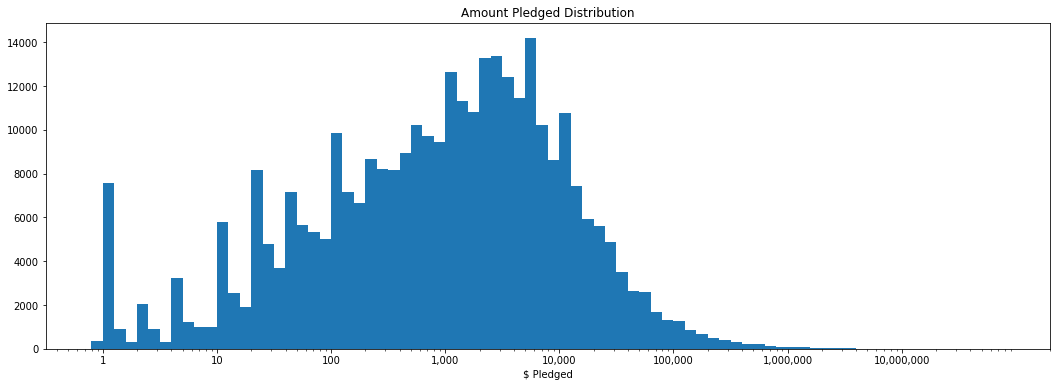

In [37]:
# USD PLEDGED DISTRIBUTION

#Selected histogram plot prameters using:(np.log10(df['usd_pledged_real'].describe()))
bins = 10 ** np.arange(-.1, 8, .1)
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'usd_pledged_real', '$ Pledged', 'Amount Pledged Distribution')

Pledge amounts seem to be slightly left skewed.

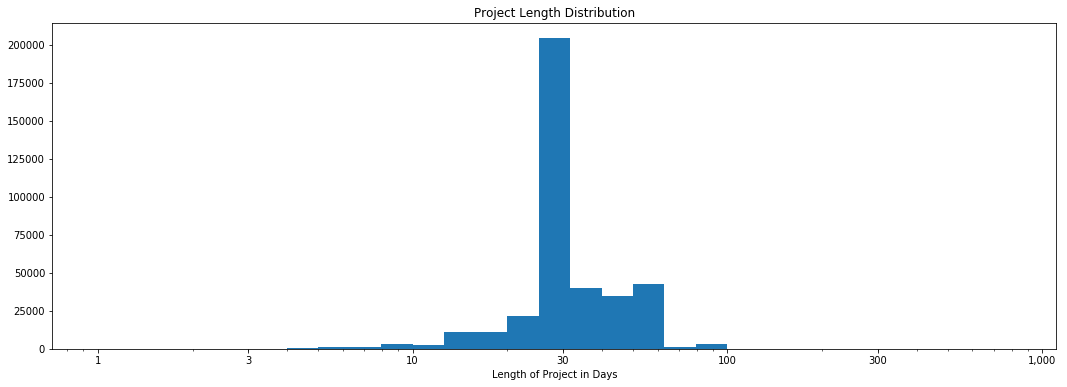

In [38]:
###Project Length Distribution

figsize = (18,6)

# Selected plot parameters using: np.log10(df['timedelta_days'].describe())
bins = 10 ** np.arange(0, 3, .1)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{:,}'.format(val) for val in ticks]

histogram_plot(df, 'timedelta_days', 'Length of Project in Days', 'Project Length Distribution')

Majority of projects have a deadline within 30 days of launch

#### Further Investigation of Outliers

In [39]:
##High Pledge Goal Projects (2.5M USD)
df.loc[df['usd_goal_real'] > 2500000].sort_values('usd_goal_real', ascending=False).head(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
47803,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,2014-08-08,2014-07-09 00:24:34,failed,0,GB,0.00,1.663614e+08,29.982639
196531,A Celtic Lovestory,Drama,Film & Video,2015-11-30,2015-11-17 00:47:15,failed,0,GB,0.00,1.513959e+08,12.966667
367928,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,2015-10-24,2015-08-25 23:52:30,failed,2,FR,2.20,1.101698e+08,59.004861
222208,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,2017-03-14,2017-01-13 20:08:41,failed,2,DE,38.65,1.073699e+08,59.160417
226161,Kitchen from Austria in Switzerland,Restaurants,Food,2015-10-05,2015-08-06 19:12:10,failed,0,CH,0.00,1.040572e+08,59.199306
257518,Peace,Film & Video,Film & Video,2017-09-13,2017-08-14 16:46:05,failed,1,US,1.00,1.000000e+08,29.300694
259186,UniqueTrends,Apparel,Fashion,2015-03-04,2015-02-02 23:52:25,failed,1,US,1.00,1.000000e+08,29.004861
371478,"""PG"" Reanimated Cartoons Tha Movie",Animation,Film & Video,2015-04-11,2015-02-10 23:49:30,failed,0,US,0.00,1.000000e+08,59.006944
214787,Is Anyone Out There ?,Technology,Technology,2015-08-01,2015-06-02 19:21:34,failed,0,US,0.00,1.000000e+08,59.193056
72775,Art Is Fabulous,Art,Art,2016-06-05,2016-04-06 02:55:07,failed,2,US,115.00,1.000000e+08,59.877778


Once again, may need to remove these rows when training a model to possibly predict chance of success. The pledge goals are unrealistic and will hurt the gernalization of our model

In [40]:
##USD Pledge goal
df.loc[df['usd_pledged_real'] > 10000000].sort_values('usd_pledged_real',
                                                      ascending=False)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,timedelta_days
157270,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,2015-03-28,2015-02-24 15:44:42,successful,78471,US,20338986.27,500000.0,31.343750
250254,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,2014-08-30,2014-07-08 10:14:37,successful,62642,US,13285226.36,50000.0,52.572917
216629,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,2016-06-30,2016-05-24 15:49:52,successful,66673,US,12779843.49,1000000.0,36.340278
289915,Kingdom Death: Monster 1.5,Tabletop Games,Games,2017-01-08,2016-11-25 06:01:41,successful,19264,US,12393139.69,100000.0,43.748611
282416,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,2012-05-19,2012-04-11 06:59:04,successful,68929,US,10266845.74,100000.0,37.708333


#### Data Preparation Conclusion

Now that the data has been reviewed and cleaned up a bit. I can better answer these questions. I will keep some of the questionable 'outlier' projects for now, but may remove them when training a model in order to help generalize better.


#### Analysis - Finding Answers

What are the most popular and/or successfull Kickstarter categories?

In [41]:
print ('Unique Categories: ',df.category.nunique())
print ('Unique Main Categories: ', df.main_category.nunique())

pd.DataFrame(data={
            'Count':df.main_category.value_counts(),
            '% of Total Projects': (df.main_category.value_counts()/(len(df))*100),
            '% of Success': (df.main_category.loc[df['state'] == 'successful']
                             .value_counts()/(len(df))*100)
            }).sort_values('Count', ascending=False)

('Unique Categories: ', 159)
('Unique Main Categories: ', 15)


,% of Success,% of Total Projects,Count
Film & Video,6.238743,16.791760,63582
Music,6.390334,13.711079,51917
Publishing,3.248382,10.530305,39873
Games,3.305955,9.304107,35230
Technology,1.699195,8.601347,32569
Design,2.786214,7.940842,30068
Art,3.039746,7.434570,28151
Food,1.607025,6.497293,24602
Fashion,1.477090,6.025617,22816
Theater,1.725604,2.881817,10912


It seems there is a correlation between how popular a category is, and its rate of success

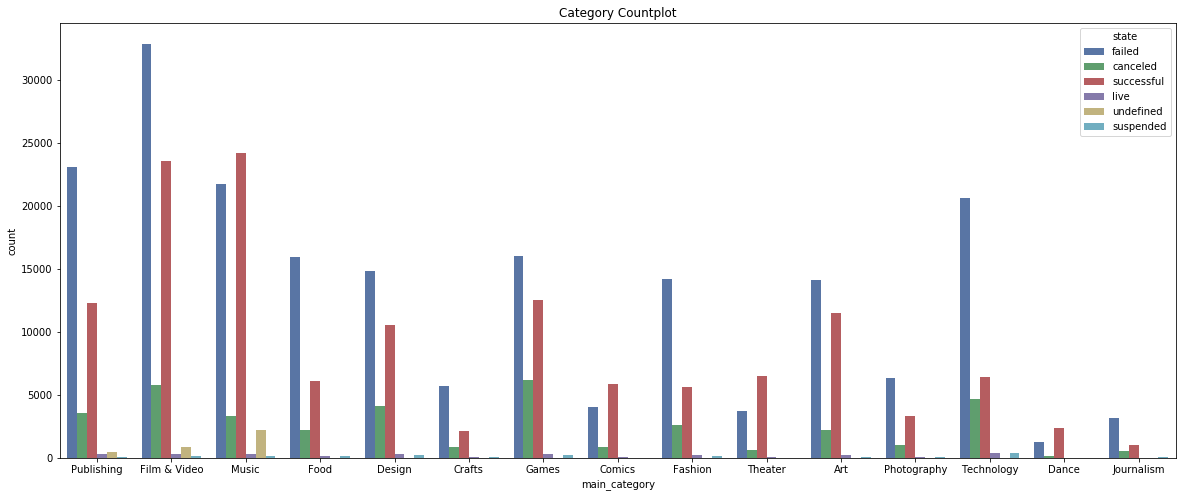

In [42]:
## State countplot by category
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,8
ax = sns.countplot(x="main_category", hue="state", palette='deep',data=df)
ax.set_title("Category Countplot");

The most popular categories in this dataset are are Film & Radio and Music. There is also an undefined state for project status.

What are the success rates of projects of different pledge goal sizes?

In [43]:
##Dropping projects with undefined and live states
df = df.loc[df.state != 'undefined']
df = df.loc[df.state != 'live']

In [44]:
#Creating Bin columns for project size
df['bin'] = pd.cut(df['usd_goal_real'],
                   [1, 1000, 10000, 100000, 1000000, 1000000000],
                   labels=['Less than 1000',
                           '1,000 to 10,000',
                           '10,000 to 100,000', 
                           '100,000 to 1,000,000',
                           'Greater than 1,000,000'],
                   duplicates='drop')

At first glance, it looks like the smaller projects seem to be more successful, as expected.

What is the average pledged by each backer for successful and failed projects?

In [45]:
###Now just with successful projects
success = df.loc[df['state'] == 'successful']

In [46]:
###Failed
failed = df.loc[df['state'] == 'failed']

### Phase #4 Modeling & #5 Evaluation


Can we predict the success of a project?

In [47]:
model_df = df.copy()

In [48]:
##Dropping some columns before training model

#Unfortunately cannot usd backers as a feature here. Since we do not know the backers of a project at the creation
#of one.
model_df = model_df.drop(['name', 'deadline', 'launched', 'backers', 'bin'], axis=1)

Last minute data cleaning for training

In [49]:
##Dropping state of undefined projects, since this is going to be our target variable
model_df = model_df.loc[df['state'] != 'undefined']

Dealing with categorical variables

In [50]:
## Getting Dummies for state column
cat_columns = ['category', 'main_category', 'country']
cat_df = pd.get_dummies(model_df[cat_columns], prefix=cat_columns)

model_df = pd.concat([model_df, cat_df], axis=1)
model_df.drop(cat_columns, axis=1, inplace=True)

#Formatting target variable to 1(successful) and 0(not successful)
model_df.state.replace(['successful', 'failed', 'canceled', 'suspended'], [1, 0, 0, 0], inplace=True)

Preprocessing Data

In [51]:
#Converting target variable to numerical values
feats = model_df.iloc[:,1:]
target = model_df.iloc[:, 0]

In [52]:
##Splitting the data
def splitting_data(X,y):
    '''
    INPUT
    X = feature data
    y = target data
    
    OUTPUT
    X_train, X_test, y_train, y_test
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = splitting_data(feats, target)

In [53]:
#Scaling Data

def scale_data(train, test):
    '''
    INPUT
    train = training dataset
    test = testing dataset
    
    OUTPUT
    scaled_X_test = test set scaled using StandardScaler
    scaled_X_train = train set scaled using StandardScaler
    '''
    scaler = StandardScaler();
    scaled_X_test = scaler.fit_transform(train);
    scaled_X_train = scaler.fit_transform(test);
    
    return scaled_X_test, scaled_X_train

X_train, X_test = scale_data(X_train, X_test);


Simple Logistic Regression Model

In [54]:
#instantiate and fit logistic regression model
clf = LogisticRegression(solver='lbfgs', max_iter=500).fit(X_train, y_train)

Scoring and Prediction

In [55]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [56]:
#import metrics from sklearn as m
from sklearn import metrics as m

In [57]:
# Calculating the accuracy
m.accuracy_score(y_test,y_pred) *100

88.54838184541252

Hence the accuracy of the Logistc regression algorith is 88.54%

In [58]:
# Calculating the precision, recall and f1-score of the algoritm
print m.classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.87      0.96      0.91     78550
          1       0.92      0.75      0.83     44306

avg / total       0.89      0.89      0.88    122856



In [59]:
print m.confusion_matrix(y_test,y_pred)

[[75499  3051]
 [11018 33288]]


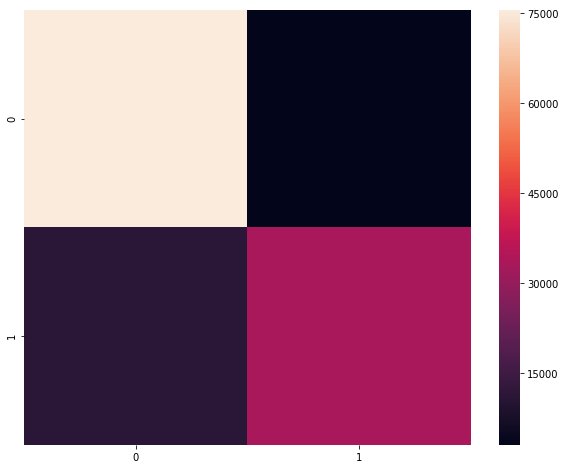

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
label = ["0","1"]
sns.heatmap(cm,xticklabels=label, yticklabels=label)


# In class lab WAP : USE CRISP-DM approach to perform  Linear and Logistic Regression
    Data Set Name: winequality red

# Take home assignment***

Based on the previous dataset "winequality red", solve the below questions:

1. Apply Multiple Linear Regression to predict pH using Fixed Acidity, volatile acidity and citric acid.
2. Also Evaluate the model by calculating RMS,MSE, R SQUARE , etc
3. Which quality of wine has highest acidity?
3. Which quality of wine has highest Basicity?